## Visualising Load Distribution

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./Dataset/minor.csv")

In [3]:
df.head()

,Time,PC,TV,Water Pump,Vacuum Cleaner,Iron Box,Dryer,Coffee Maker,Range Top (S),Range Top (L),...,Washing Machine,Dish Washer,Oven,PHEV,AC,Fridge,Light,Fan,Units Consumed (kWh),TOU Price (Rs/hr)
0,00:15,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,0,0,1.11,7
1,00:30,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,0,0,1.11,7
2,00:45,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,0,0,1.11,7
3,01:00,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,0,0,1.11,7
4,01:15,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,0,0,1.11,7


<Figure size 7200x3600 with 0 Axes>

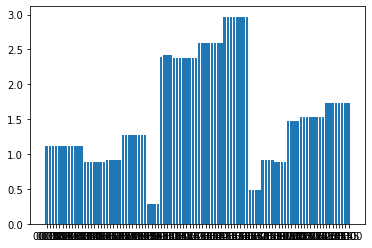

<Figure size 7200x3600 with 0 Axes>

In [4]:
plt.bar(df.Time, height = df["Units Consumed (kWh)"])
plt.figure(figsize = (100, 50))

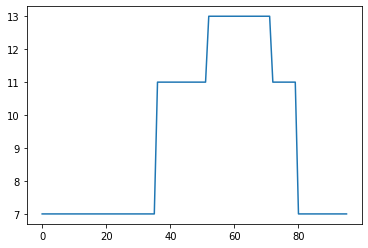

In [5]:
plt.plot(df["TOU Price (Rs/hr)"])

In [6]:
# loading dataframe for calculating frequencies...

df_for_freq = pd.read_csv("./Dataset/minor.csv")
df_for_freq

,Time,PC,TV,Water Pump,Vacuum Cleaner,Iron Box,Dryer,Coffee Maker,Range Top (S),Range Top (L),...,Washing Machine,Dish Washer,Oven,PHEV,AC,Fridge,Light,Fan,Units Consumed (kWh),TOU Price (Rs/hr)
0,00:15,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,0,0,1.11,7
1,00:30,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,0,0,1.11,7
2,00:45,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,0,0,1.11,7
3,01:00,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,0,0,1.11,7
4,01:15,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,0,0,1.11,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,23:00,0,0,0,0,1,0,0,0,0,...,0,1,0,1,1,1,1,0,1.73,7
92,23:15,0,0,0,0,1,0,0,0,0,...,0,1,0,1,1,1,1,0,1.73,7
93,23:30,0,0,0,0,1,0,0,0,0,...,0,1,0,1,1,1,1,0,1.73,7
94,23:45,0,0,0,0,1,0,0,0,0,...,0,1,0,1,1,1,1,0,1.73,7


In [7]:
# Freq dict
power_ratings = {
    "PC":0.025,
    "TV":0.0375,
    "Water Pump": 0.1875,
    "Vacuum Cleaner":0.185,
    "Iron Box": 0.275,
    "Dryer":1.375,
    "Coffee Maker": 0.0875,
    "Range Top (S)": 0.4,
    "Range Top (L)": 0.675,
    "Microwave Oven": 0.2,
    "Toaster": 0.275,
    "Toaster Oven":0.375,
    "Oven Cleaner": 0.875,
    "Washing Machine": 0.166,
    "Dish Washer": 0.3,
    "Oven": 0.875,
    "PHEV": 0.825,
    "AC": 0.25,
    "Fridge": 0.036,
    "Light": 0.04,
    "Fan": 0.015,
}

freq_dict = {}
for i in df_for_freq.columns[1:-2]:
    freq_dict[i] = (power_ratings[i],sum(df_for_freq[i]))                                                                       

In [8]:
"""
The Columns Fridge, Dish Washer, Range Top (S) and Range Top (L)
have been removed for the purpose of displaying our project
in hardware via Arduino of 19 available pins.
"""

freq_dict.pop("Range Top (S)")
freq_dict.pop("Range Top (L)")
freq_dict.pop("Fridge")
freq_dict.pop("Dish Washer")

(0.3, 20)

In [9]:
mat = pd.DataFrame(np.zeros((96, 18)), dtype = "int")
mat

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
93,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
94,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
cols = sorted(freq_dict, key = lambda x: freq_dict[x][0], reverse = True)
cols.insert(0, "TOU")

In [11]:
mat.columns = cols

In [12]:
mat

,TOU,Dryer,Oven Cleaner,Oven,PHEV,Toaster Oven,Iron Box,Toaster,AC,Microwave Oven,Water Pump,Vacuum Cleaner,Washing Machine,Coffee Maker,Light,TV,PC,Fan
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
93,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
94,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
TOU = np.array([7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 11, 11, 11, 11, 11, 11, 11, 11, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7])

In [14]:
mat.TOU = TOU

In [15]:
mat

,TOU,Dryer,Oven Cleaner,Oven,PHEV,Toaster Oven,Iron Box,Toaster,AC,Microwave Oven,Water Pump,Vacuum Cleaner,Washing Machine,Coffee Maker,Light,TV,PC,Fan
0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
92,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
93,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
94,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [16]:
mat = mat.sort_values(by = "TOU")

In [17]:
mat

,TOU,Dryer,Oven Cleaner,Oven,PHEV,Toaster Oven,Iron Box,Toaster,AC,Microwave Oven,Water Pump,Vacuum Cleaner,Washing Machine,Coffee Maker,Light,TV,PC,Fan
0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
28,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
29,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
30,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
56,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
55,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
69,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
mat = mat.reset_index()

In [19]:
"""
Schedule by running loop using the new indices.
Then sort the dataframe again on the basis of "index" column
Finally, change index column to Time column.
and export as CSV.
"""

'\nSchedule by running loop using the new indices.\nThen sort the dataframe again on the basis of "index" column\nFinally, change index column to Time column.\nand export as CSV.\n'

In [20]:
# filling 1st appliance with default cost
for i in range(16):
    mat["Dryer"][i] = mat["TOU"][i] * freq_dict["Dryer"][0]

In [21]:
mat

,index,TOU,Dryer,Oven Cleaner,Oven,PHEV,Toaster Oven,Iron Box,Toaster,AC,Microwave Oven,Water Pump,Vacuum Cleaner,Washing Machine,Coffee Maker,Light,TV,PC,Fan
0,0,7,9.625,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,28,7,9.625,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,29,7,9.625,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,30,7,9.625,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,31,7,9.625,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,57,13,0.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
92,56,13,0.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
93,55,13,0.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
94,69,13,0.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [22]:
cols = mat.columns[2:]
print(cols)

Index(['Dryer', 'Oven Cleaner', 'Oven', 'PHEV', 'Toaster Oven', 'Iron Box',
       'Toaster', 'AC', 'Microwave Oven', 'Water Pump', 'Vacuum Cleaner',
       'Washing Machine', 'Coffee Maker', 'Light', 'TV', 'PC', 'Fan'],
      dtype='object')


In [23]:
# dicti = {
#     7: (0, 63),
#     11: (51, minm val for 11 cost),
#     13: (75, minm val for 11 cost)
# }

# minm = min([dicti[i][1] for i in dicti])

In [24]:
# for i in range(1, len(cols)):
#     # Current column is mat[cols[i]]
#     # This loop traverse through columns
#     # dic holds costs in TOU column as keys. Value = (index of start of that TOU price, cost to be applied to that )
#     dic = {
#         7:[0,0]
#     }
#     minm = 99999999
#     for j in mat[cols[i]]:
#         if minm > (mat[cols[i-1]][j] + freq_dict[cols[i]][0]*mat["TOU"][j]):
#             minm = (mat[cols[i-1]][j] + freq_dict[cols[i]][0]*mat["TOU"][j])
            
#     print(minm)
#     break

freq_dict

{'PC': (0.025, 39),
 'TV': (0.0375, 40),
 'Water Pump': (0.1875, 24),
 'Vacuum Cleaner': (0.185, 24),
 'Iron Box': (0.275, 20),
 'Dryer': (1.375, 16),
 'Coffee Maker': (0.0875, 8),
 'Microwave Oven': (0.2, 12),
 'Toaster': (0.275, 8),
 'Toaster Oven': (0.375, 12),
 'Oven Cleaner': (0.875, 16),
 'Washing Machine': (0.166, 16),
 'Oven': (0.875, 12),
 'PHEV': (0.825, 48),
 'AC': (0.25, 36),
 'Light': (0.04, 49),
 'Fan': (0.015, 60)}

In [25]:
for col in range(3, len(mat.columns)):  
    print(mat.columns[col])
    mat[mat.columns[col]] = mat[mat.columns[col]] + mat[mat.columns[col-1]]
    costs_in_current_column = {}
    for j in range(len(mat[mat.columns[col]])):
        cost = mat[mat.columns[col]][j] + mat["TOU"][j]*freq_dict[mat.columns[col]][0]
        if cost not in costs_in_current_column:
            # if the cost of this appliance for the current TOU is not in the costs_in_current_column dict
            # add that cost, and the value will be the index where its first entry is detected.
            costs_in_current_column[cost] = j
            
#     print(col, costs_in_current_column)
            
    # Now we start with filling process
    # costs is a sorted list containing sorted tuples of key value pairs of original costs_in_current_column dict.
    # c_iter iterates through the sorted list
    # itr iterates through the column. This will be changing its position as per the requirement of filling.
    costs = sorted(costs_in_current_column.items())
    c_itr = 0
    itr = costs[c_itr][1]
    # present_cost keeps track of the change in the cost while traversing. 

    for _ in range(freq_dict[mat.columns[col]][1]):       
        present_cost = mat[mat.columns[col]][itr] + (mat["TOU"][itr]*freq_dict[mat.columns[col]][0])
        if present_cost != costs[c_itr][0] and c_itr<len(costs)-1:
            c_itr += 1
            itr = costs[c_itr][1]
        mat[mat.columns[col]][itr] = present_cost
        
        if itr < 95:
            itr+=1
        else:
            c_itr += 1
            itr = costs[c_itr][1]

Oven Cleaner
Oven
PHEV
Toaster Oven
Iron Box
Toaster
AC
Microwave Oven
Water Pump
Vacuum Cleaner
Washing Machine
Coffee Maker
Light
TV
PC
Fan


/tmp/ipykernel_31737/2142262738.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mat[mat.columns[col]][itr] = present_cost


In [26]:
mat

,index,TOU,Dryer,Oven Cleaner,Oven,PHEV,Toaster Oven,Iron Box,Toaster,AC,Microwave Oven,Water Pump,Vacuum Cleaner,Washing Machine,Coffee Maker,Light,TV,PC,Fan
0,0,7,9.625,9.625,9.625,9.625,9.625,9.625,9.625,9.625,11.025,11.0250,11.0250,11.0250,11.0250,11.7950,11.7950,11.7950,11.7950
1,28,7,9.625,9.625,9.625,9.625,9.625,9.625,9.625,9.625,11.025,11.0250,11.0250,11.0250,11.0250,11.3050,11.3050,11.2875,11.6125
2,29,7,9.625,9.625,9.625,9.625,9.625,9.625,9.625,9.625,11.025,11.0250,11.0250,11.0250,11.0250,11.3050,11.3050,11.4800,11.6725
3,30,7,9.625,9.625,9.625,9.625,9.625,9.625,9.625,9.625,11.025,11.0250,11.0250,11.0250,11.0250,11.3050,11.3050,11.4800,11.5850
4,31,7,9.625,9.625,9.625,9.625,9.625,9.625,9.625,9.625,9.625,10.9375,10.9375,10.9375,10.9375,11.3925,11.3925,11.3925,11.8475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,57,13,0.000,0.000,0.000,10.725,10.725,10.725,10.725,10.725,10.725,10.7250,10.7250,10.7250,10.7250,11.2450,11.2450,11.2450,11.4400
92,56,13,0.000,0.000,0.000,0.000,4.875,4.875,4.875,8.125,11.275,11.2750,11.2750,11.2750,11.2750,11.2750,11.2750,11.2750,11.9675
93,55,13,0.000,0.000,0.000,0.000,4.875,4.875,4.875,8.125,10.725,10.7250,10.7250,10.7250,10.7250,10.7250,11.9050,11.9050,11.9050
94,69,13,0.000,0.000,0.000,0.000,4.875,4.875,4.875,8.125,10.725,10.7250,10.7250,10.7250,10.7250,10.7250,11.2125,11.2125,11.5850


In [27]:
mat.head(50)

,index,TOU,Dryer,Oven Cleaner,Oven,PHEV,Toaster Oven,Iron Box,Toaster,AC,Microwave Oven,Water Pump,Vacuum Cleaner,Washing Machine,Coffee Maker,Light,TV,PC,Fan
0,0,7,9.625,9.625,9.625,9.625,9.625,9.625,9.625,9.625,11.025,11.0250,11.0250,11.0250,11.0250,11.7950,11.7950,11.7950,11.7950
1,28,7,9.625,9.625,9.625,9.625,9.625,9.625,9.625,9.625,11.025,11.0250,11.0250,11.0250,11.0250,11.3050,11.3050,11.2875,11.6125
2,29,7,9.625,9.625,9.625,9.625,9.625,9.625,9.625,9.625,11.025,11.0250,11.0250,11.0250,11.0250,11.3050,11.3050,11.4800,11.6725
3,30,7,9.625,9.625,9.625,9.625,9.625,9.625,9.625,9.625,11.025,11.0250,11.0250,11.0250,11.0250,11.3050,11.3050,11.4800,11.5850
4,31,7,9.625,9.625,9.625,9.625,9.625,9.625,9.625,9.625,9.625,10.9375,10.9375,10.9375,10.9375,11.3925,11.3925,11.3925,11.8475
5,32,7,9.625,9.625,9.625,9.625,9.625,9.625,9.625,9.625,9.625,10.9375,10.9375,10.9375,10.9375,11.2175,11.2175,11.9475,11.9475
6,33,7,9.625,9.625,9.625,9.625,9.625,9.625,9.625,9.625,9.625,10.9375,10.9375,10.9375,10.9375,11.2175,11.2175,11.3925,11.3925
7,34,7,9.625,9.625,9.625,9.625,9.625,9.625,9.625,9.625,9.625,10.9375,10.9375,10.9375,10.9375,11.2175,11.2175,11.3925,11.3925
8,35,7,9.625,9.625,9.625,9.625,9.625,9.625,9.625,9.625,9.625,10.9375,10.9375,10.9375,10.9375,11.2175,11.2175,11.3925,11.3925
9,94,7,9.625,9.625,9.625,9.625,9.625,9.625,9.625,9.625,9.625,10.9375,10.9375,10.9375,10.9375,11.2175,11.2175,11.3925,11.3925


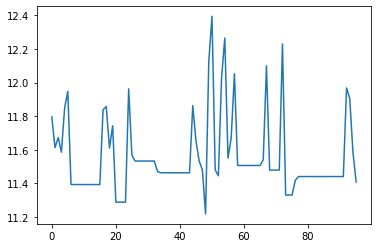

In [28]:
plt.plot(mat.Fan)

In [29]:
mat.tail(50)

,index,TOU,Dryer,Oven Cleaner,Oven,PHEV,Toaster Oven,Iron Box,Toaster,AC,Microwave Oven,Water Pump,Vacuum Cleaner,Washing Machine,Coffee Maker,Light,TV,PC,Fan
46,22,7,0.0,0.0,0.0,5.775,8.400,8.400,8.400,10.150,10.150,10.1500,10.1500,10.1500,10.7625,11.0425,11.3050,11.5325,11.5325
47,17,7,0.0,0.0,0.0,5.775,8.400,8.400,8.400,10.150,10.150,10.1500,10.1500,10.1500,10.7625,11.0425,11.3050,11.4800,11.4800
48,16,7,0.0,0.0,0.0,5.775,8.400,8.400,8.400,8.400,9.800,11.1125,11.1125,11.1125,11.1125,11.1125,11.1125,11.1125,11.2175
49,1,7,0.0,0.0,0.0,5.775,8.400,8.400,8.400,8.400,9.800,11.1125,11.1125,11.1125,11.1125,11.1125,12.1250,12.1250,12.1250
50,18,7,0.0,0.0,0.0,5.775,8.400,8.400,8.400,8.400,9.800,11.1125,11.1125,11.1125,11.1125,11.1125,11.3750,11.3750,12.3950
51,25,7,0.0,0.0,0.0,5.775,8.400,8.400,8.400,8.400,9.800,11.1125,11.1125,11.1125,11.1125,11.1125,11.3750,11.3750,11.4800
52,72,11,0.0,0.0,0.0,9.075,9.075,9.075,9.075,9.075,9.075,9.0750,11.4450,11.4450,11.4450,11.4450,11.4450,11.4450,11.4450
53,79,11,0.0,0.0,0.0,9.075,9.075,9.075,9.075,9.075,9.075,9.0750,11.1100,11.1100,11.1100,11.1100,11.1100,12.0325,12.0325
54,78,11,0.0,0.0,0.0,9.075,9.075,9.075,9.075,9.075,9.075,9.0750,11.1100,11.1100,11.1100,11.1100,11.1100,11.3850,12.2650
55,77,11,0.0,0.0,0.0,9.075,9.075,9.075,9.075,9.075,9.075,9.0750,11.1100,11.1100,11.1100,11.1100,11.1100,11.3850,11.5500


In [30]:
mat[mat.columns[10:14]]

,Microwave Oven,Water Pump,Vacuum Cleaner,Washing Machine
0,11.025,11.0250,11.0250,11.0250
1,11.025,11.0250,11.0250,11.0250
2,11.025,11.0250,11.0250,11.0250
3,11.025,11.0250,11.0250,11.0250
4,9.625,10.9375,10.9375,10.9375
...,...,...,...,...
91,10.725,10.7250,10.7250,10.7250
92,11.275,11.2750,11.2750,11.2750
93,10.725,10.7250,10.7250,10.7250
94,10.725,10.7250,10.7250,10.7250


In [31]:
print(sum(mat.Fan))

1109.402000000001


In [32]:
mat = mat.set_index("index")

In [33]:
mat = mat.sort_values(by = "index")

In [34]:
mat

,TOU,Dryer,Oven Cleaner,Oven,PHEV,Toaster Oven,Iron Box,Toaster,AC,Microwave Oven,Water Pump,Vacuum Cleaner,Washing Machine,Coffee Maker,Light,TV,PC,Fan
index,,,,,,,,,,,,,,,,,,
0,7,9.625,9.625,9.625,9.625,9.625,9.625,9.625,9.625,11.025,11.0250,11.0250,11.0250,11.0250,11.7950,11.7950,11.7950,11.7950
1,7,0.000,0.000,0.000,5.775,8.400,8.400,8.400,8.400,9.800,11.1125,11.1125,11.1125,11.1125,11.1125,12.1250,12.1250,12.1250
2,7,0.000,0.000,6.125,6.125,6.125,6.125,8.050,9.800,9.800,9.8000,11.0950,11.0950,11.0950,11.0950,11.3575,11.3575,11.4625
3,7,0.000,0.000,6.125,6.125,6.125,6.125,8.050,9.800,9.800,9.8000,11.0950,11.0950,11.0950,11.0950,11.3575,11.3575,11.4625
4,7,0.000,0.000,6.125,6.125,6.125,6.125,8.050,9.800,9.800,9.8000,11.0950,11.0950,11.0950,11.0950,11.3575,11.3575,11.4625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,7,0.000,6.125,6.125,6.125,6.125,8.050,8.050,9.800,9.800,11.1125,11.1125,11.1125,11.1125,11.1125,11.1125,11.2875,11.2875
92,7,0.000,6.125,6.125,6.125,6.125,8.050,8.050,9.800,9.800,11.1125,11.1125,11.1125,11.1125,11.1125,11.1125,11.2875,11.2875
93,7,0.000,6.125,6.125,6.125,6.125,8.050,8.050,9.800,9.800,11.1125,11.1125,11.1125,11.1125,11.1125,11.1125,11.2875,11.2875


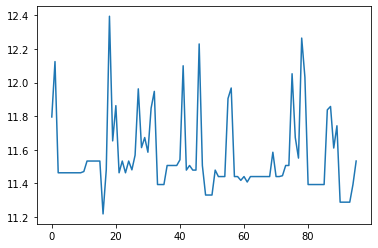

In [35]:
plt.plot(mat.Fan)

In [36]:
# Conversion of Non Binary Scheduled load to Binary Scheduled load

new_mat = mat.copy()
for col in range(len(new_mat.columns)- 1, 1, -1):
    new_mat[new_mat.columns[col]] = new_mat[new_mat.columns[col]] - new_mat[new_mat.columns[col-1]]
    for j in range(len(new_mat[new_mat.columns[col]])):
        if new_mat[new_mat.columns[col]][j] != 0:
            new_mat[new_mat.columns[col]][j] = int(1)
        else:
            new_mat[new_mat.columns[col]][j] = int(0)

for i in range(len(new_mat[new_mat.columns[1]])):
    if new_mat[new_mat.columns[1]][i] == 0:
        new_mat[new_mat.columns[1]][i] = int(0)
    else:
        new_mat[new_mat.columns[1]][i] = int(1)
    

/tmp/ipykernel_31737/4207457959.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_mat[new_mat.columns[col]][j] = int(0)
/tmp/ipykernel_31737/4207457959.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_mat[new_mat.columns[col]][j] = int(1)
/tmp/ipykernel_31737/4207457959.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_mat[new_mat.columns[1]][i] = int(1)
/tmp/ipykernel_31737/4207457959.py:14: SettingWithCopyWarning

In [42]:
new_mat.head(50)

,TOU,Dryer,Oven Cleaner,Oven,PHEV,Toaster Oven,Iron Box,Toaster,AC,Microwave Oven,Water Pump,Vacuum Cleaner,Washing Machine,Coffee Maker,Light,TV,PC,Fan
index,,,,,,,,,,,,,,,,,,
0,7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,7,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,7,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,7,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,7,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
5,7,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
6,7,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
7,7,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
8,7,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [38]:
#The Final optimised binary output is retrieved.